# K-Nearest Neighbor Modelling

Implementation of K-Nearest Neighbor Algorithm Using Term Weighting TF-IDF to Categorize the Title of Bachelor Thesis at Department of Informatics of Universitas Dian Nuswantoro


## Contents of this notebook

*  TEXT ANALYSIS

    * Having a peek at the Data
            - Total of Data
            - Total of Categories
            - Total Range of Graduation years
        
*  TEXT TRANSFORMATION

    * Data Cleaning (Removing unimportant data/ Stopwords/ Stemming)
            - Stopword term of Data
            - Stemming term of Data

    * Converting data into a model usable format
            - Convert to TFIDF vector
            
*  MODEL APPLICATION
        - Analyzing of K value for determine The Best K value
        - Classification KNN with Best value of K
        - Evaluation Overview Using Accuracy, Recall and Precision

### Text Analysis

> The puprose on this task is to analyzed our datas and categories

> like total of categories, top words or topics


In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import nltk
# nltk.download("all")
# nltk.download('/punkt')
import string
from nltk.tokenize import word_tokenize


In [2]:
finalExamTitles = pd.read_csv("../AppData/dumyData.csv", encoding = 'latin-1',delimiter=";",)
finalExamTitles.columns = ["Tahun Lulus","Judul","Kategori"]

#### Total of Data
In this phase, we will analyze our data, especially counts of the Data

In [3]:
print(f'Total Data : {finalExamTitles.shape[0]} items')

Total Data : 372 items


##### An Examples of Data
This Phase, we show 10 random of our data

In [4]:
pd.options.display.width = 120
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 200
display(finalExamTitles.sample(n = 10))

,Tahun Lulus,Judul,Kategori
347,2017,ALGORITMA K-MEANS BERDASARKAN VARIAN JARAK UNTUK PENGELOMPOKAN CITRA DAGING ...,Image Processing
332,2017,KEAMANAN CITRA DIGITAL MENGGUNAKAN TEKNIK WATERMARKING DENGAN LEVEL 1 HWT-CRT,Steganografi
93,2019,SISTEM PROVISIONING HELPDESK DAN MONITORING LAYANAN PELANGGAN PADA PT. MEDIA...,Rekayasa Perangkat Lunak
223,2018,PREDIKSI HARGA ETHEREUM MENGGUNAKAN ALGORITMA BACKPROPAGATION,Artificial Intelligence
280,2018,SISTEM ANALISIS SENTIMEN NASABAH PADA PT. BANK RAKYAT INDONESIA (PERSERO) TB...,Text Mining
139,2019,Klasifikasi Tipe Rumah Sakit Umum di Jawa Tengah Menggunakan Metode Naive Ba...,Data Mining
187,2019,PENERAPAN FINITE STATE MACHINE PADA AGEN CERDAS PERMAINAN TRADISIONAL PETAK ...,Artificial Intelligence
104,2019,PROCEDURAL CONTENT GENERATION PADA STATUS ITEM DARI GAME RPG MENGGUNAKAN ALG...,Artificial Intelligence
107,2019,IMPLEMENTASI TEXT MINING DALAM PENGKLASIFIKASIAN BUKU BERDASARKAN JUDUL DAN ...,Text Mining
15,2019,IMPLEMENTASI WEB SERVICE PADA PT. TELEVISI KAMPUS UNIVERSITAS DIAN NUSWANTOR...,Rekayasa Perangkat Lunak


#### Percentage of The Categories
This phase, we will see percentage of the categories our data

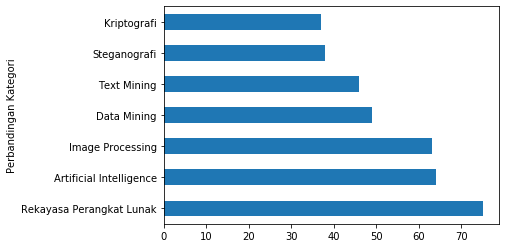

In [5]:

# finalExamTitles["Kategori"].value_counts().plot(kind = 'barh', figsize = (6, 6), autopct = '%1.1f%%')

finalExamTitles["Kategori"].value_counts().plot(kind = 'barh')
plt.ylabel("Perbandingan Kategori")
plt.show()

# print (CountStatus)

In [6]:
CountStatus = pd.value_counts(finalExamTitles['Kategori'].values, sort=True)
print(CountStatus)

Rekayasa Perangkat Lunak    75
Artificial Intelligence     64
Image Processing            63
Data Mining                 49
Text Mining                 46
Steganografi                38
Kriptografi                 37
dtype: int64


### Percentage and Total Of Graduation Year

In [7]:
CountStatus = pd.value_counts(finalExamTitles['Tahun Lulus'].values, sort=True)
print(CountStatus)

2019    194
2018     93
2017     85
dtype: int64


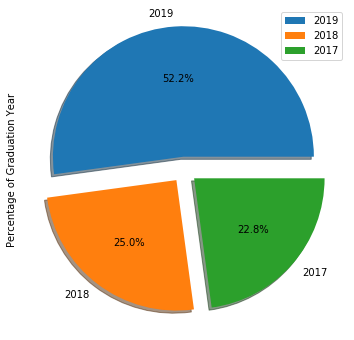

In [8]:
finalExamTitles["Tahun Lulus"].value_counts().plot(kind = 'pie', explode = [0.1, 0.1,0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Percentage of Graduation Year")
plt.legend(["2019", "2018","2017"])
plt.show()

### Most Topics 2019

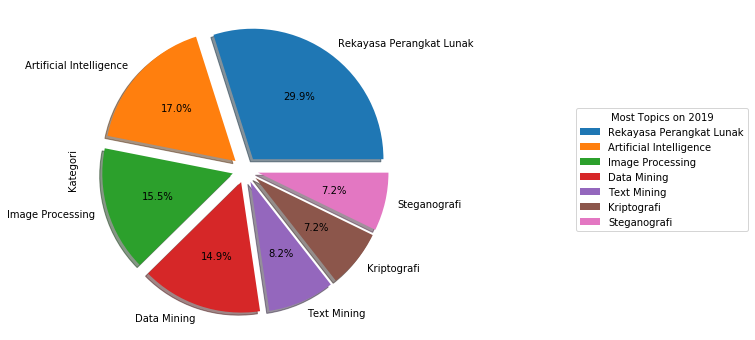

In [9]:
mostYearTopic=finalExamTitles[finalExamTitles["Tahun Lulus"]==2019]
most2019Topics=pd.value_counts(mostYearTopic['Kategori'].values, sort=True)
mostYearTopic["Kategori"].value_counts().plot(kind = 'pie', explode = [0.1, 0.1,0.1,0.1, 0.1,0.1,0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
# plt.ylabel("Most Topic on 2019")
# plt.legend(["2019", "2018","2017"])
plt.legend(title="Most Topics on 2019",loc="center left",bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()


In [10]:
most2019Topics

Rekayasa Perangkat Lunak    58
Artificial Intelligence     33
Image Processing            30
Data Mining                 29
Text Mining                 16
Kriptografi                 14
Steganografi                14
dtype: int64

### Most Topics on 2018

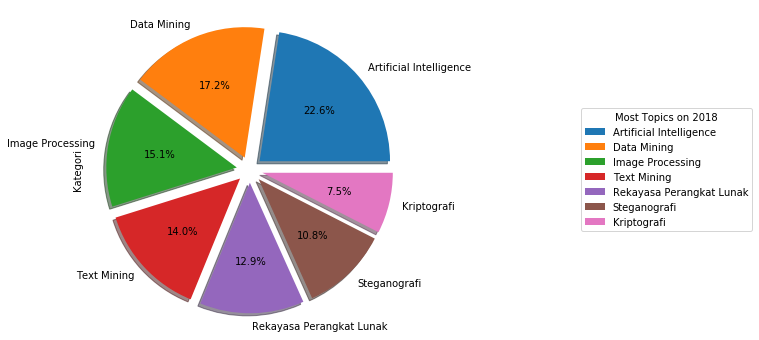

In [11]:
mostYearTopic=finalExamTitles[finalExamTitles["Tahun Lulus"]==2018]
most2018Topics=pd.value_counts(mostYearTopic['Kategori'].values, sort=True)
mostYearTopic["Kategori"].value_counts().plot(kind = 'pie', explode = [0.1, 0.1,0.1,0.1, 0.1,0.1,0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

plt.legend(title="Most Topics on 2018",loc="center left",bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()


In [12]:
most2018Topics

Artificial Intelligence     21
Data Mining                 16
Image Processing            14
Text Mining                 13
Rekayasa Perangkat Lunak    12
Steganografi                10
Kriptografi                  7
dtype: int64

### Most Topics on 2017

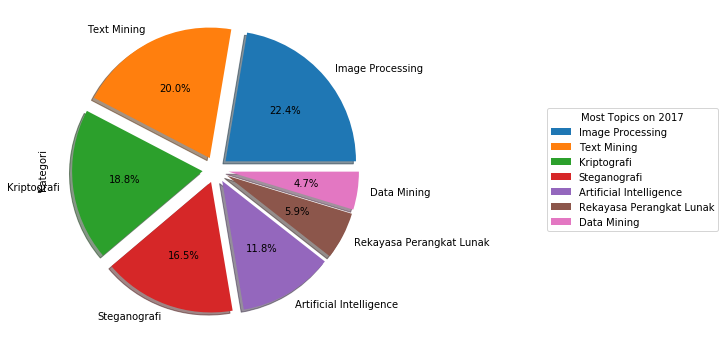

In [13]:
mostYearTopic=finalExamTitles[finalExamTitles["Tahun Lulus"]==2017]
most2017Topics=pd.value_counts(mostYearTopic['Kategori'].values, sort=True)
mostYearTopic["Kategori"].value_counts().plot(kind = 'pie', explode = [0.1, 0.1,0.1,0.1, 0.1,0.1,0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

plt.legend(title="Most Topics on 2017",loc="center left",bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()


In [14]:
most2017Topics

Image Processing            19
Text Mining                 17
Kriptografi                 16
Steganografi                14
Artificial Intelligence     10
Rekayasa Perangkat Lunak     5
Data Mining                  4
dtype: int64

<center><h1>Text Processing</h1> </center>

In this phase, we will clean our data, with some methods like stopwords, stemming and the final result
the text will transformed to vectorize array.

and we will implement TF-IDF method for weghting the words. It will filtered importance words for each documents or data.
 

<center><b>Stopword Process</center>
    
in this phase, we use sastrawi for stopword Indonesian language and NLTK Stopword for english language if any words in english on the title of thesis

Now define our text processing function. It will stopwords both Indonesia or English.

In [15]:
# indonesian Stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#english Stopword
from nltk.corpus import stopwords

# create stemmer
factoryStem = StemmerFactory()
stemmerID = factoryStem.create_stemmer()

factoryStop = StopWordRemoverFactory()
stopwordID = factoryStop.get_stop_words()

def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english') and word.lower() not in stopwordID]
    words = ""
    for word in text:
            words += (stemmerID.stem(word))+" "
#     return " ".join(text)
    return words



In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

title_feat = finalExamTitles['Judul'].copy()
textWithStemAndStop=title_feat.apply(text_process)
# print(textWithStemAndStop)

vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(textWithStemAndStop)
print(features.shape[1])

1432


Now split for fitting and testing our Classifiers:



In [17]:
features_train, features_test, labels_train, labels_test = train_test_split(features, finalExamTitles['Kategori'],test_size=0.3, random_state=42)
# print(labels_train)

<center><h1>Classification</h1></center>

,Score
13,0.75


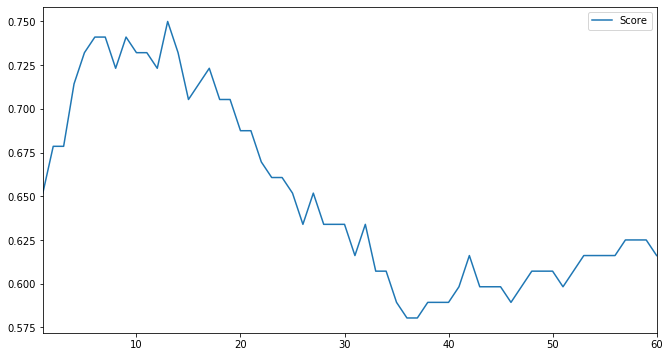

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

pred_scores = []
for i in range(1,61):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(features_train, labels_train)
    pred = knc.predict(features_test)
    pred_scores.append((i, [accuracy_score(labels_test,pred)]))
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df.plot(figsize=(11,6))

df[df['Score'] == df['Score'].max()]
# df[df['Score'] == df['Score'].min()]


<center><h2>Testing New Model With best K </h2></center>

##### Generating new Data Testing

In [19]:
Model_train, Model_test, Kategori_train, Kategori_test = train_test_split(title_feat, finalExamTitles['Kategori'],test_size=0.3, random_state=42)
newDataTestFrame=pd.concat([pd.DataFrame(Model_test),pd.DataFrame(Kategori_test)],axis=1)
newDataTestFrame

,Judul,Kategori
327,Penerapan Algoritma K-NEAREST NEIGHBOR dan K-Means untuk Penggolongan Pendap...,Text Mining
33,KLASIFIKASI DIABETES MELITUS DENGAN K-NEAREST NEIGHBOR BERBASIS FITUR FORWAR...,Data Mining
15,IMPLEMENTASI WEB SERVICE PADA PT. TELEVISI KAMPUS UNIVERSITAS DIAN NUSWANTOR...,Rekayasa Perangkat Lunak
314,APLIKASI REKOMENDASI STOCK SPARE PART DI SEJAHTERA MOTOR BERBASIS TIME SERIE...,Artificial Intelligence
57,PENERAPAN ALGORITMA AES DAN LSB UNTUK MENGAMANKAN FILE YANG AKAN DILAMPIRKAN...,Kriptografi
...,...,...
367,Implementasi Algoritma Data Encryption Standard (DES) dalam Pengamanan Data ...,Kriptografi
301,ANALISA SENTIMEN PADA DATA TWITTER TERHADAP PILKADA SERENTAK 2017 MENGGUNAKA...,Text Mining
334,IMPLEMENTASI ALGORITMA AGGLOMERATIVE HIERARCHICAL CLUSTERING DAN NAIVE BAYES...,Text Mining
271,KOMPARASI KETAHANAN CITRA PADA METODE DISCRETE WAVELET TRANSFORM DENGAN GABU...,Image Processing


#### Generating New Model 

In [20]:
## Highlight Function 
def highlight_greater(x):
    r = 'yellow'

    m1 = x['Actual Category'] != x['Predicted']

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Actual Category'] = np.where(m1, 'background-color: {}'.format(r), df1['Actual Category'])
    df1['Predicted'] = np.where(m1, 'background-color: {}'.format(r), df1['Predicted'])
    return df1


def color_negative(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    r = 'black'

    m1 = x['Actual Category'] != x['Predicted']

    df1 = pd.DataFrame('color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Actual Category'] = np.where(m1, 'color: {}'.format(r), df1['Actual Category'])
    df1['Predicted'] = np.where(m1, 'color: {}'.format(r), df1['Predicted'])
    return df1

# Start Generating Model 
# Stopword ID
newDataStop=newDataTestFrame['Judul'].apply(text_process)
newDataVec=vectorizer.transform(newDataStop)

# creating new Model KNN with Best K value
newModel = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
newModel.fit(features_train, labels_train)

# Predict New Data
newDataClass=newModel.predict(newDataVec)

# merging old Data with new Class
# newData=pd.read_csv("../AppSrc/Data/dumyData.csv", encoding = 'latin-1',delimiter=";",skiprows=skip_idx)
newDataTestFrame=newDataTestFrame.rename(columns={"Kategori":"Actual Category"})

# newData=newData.drop(['Tahun Lulus','NIM'],axis=1)
predictedColumn={"Predicted":newDataClass}
pd.options.display.width = 120
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 200
# pd.concat(newDataTestFrame)p
predictedColumn=pd.DataFrame(predictedColumn)

x=newDataTestFrame.assign(Predicted=predictedColumn.values)

x.style.apply(color_negative, axis=None).apply(highlight_greater,axis=None)

# x.to_csv("hasilklasifikasi.csv")

,Judul,Actual Category,Predicted
327,Penerapan Algoritma K-NEAREST NEIGHBOR dan K-Means untuk Penggolongan Pendapat Masyarakat di Twitter Terhadap PT POS Indonesia,Text Mining,Text Mining
33,KLASIFIKASI DIABETES MELITUS DENGAN K-NEAREST NEIGHBOR BERBASIS FITUR FORWARD SELECTION DI RSUD Dr. R SOEDJATI,Data Mining,Image Processing
15,IMPLEMENTASI WEB SERVICE PADA PT. TELEVISI KAMPUS UNIVERSITAS DIAN NUSWANTORO MENGGUNAKAN METODE REST,Rekayasa Perangkat Lunak,Rekayasa Perangkat Lunak
314,APLIKASI REKOMENDASI STOCK SPARE PART DI SEJAHTERA MOTOR BERBASIS TIME SERIES ALGORITMA SINGLE EXPONENTIAL SMOOTHING,Artificial Intelligence,Artificial Intelligence
57,PENERAPAN ALGORITMA AES DAN LSB UNTUK MENGAMANKAN FILE YANG AKAN DILAMPIRKAN PADA EMAIL SEBAGAI ANTISIPASI KEGAGALAN PENGAMANAN EMAIL DENGAN TLS,Kriptografi,Kriptografi
239,PENERAPAN ALGORITMA FP-GROWTH UNTUK MEREKOMENDASIKAN PRODUK PADA TOKO ONLINE PAKAIAN ANAK-ANAK,Data Mining,Data Mining
76,KEAMANAN CITRA DIGITAL BERWARNA DENGAN MENGGUNAKANKOMBINASI LEAST SIGNIFICANT BIT(LSB-1) DAN ALGORITMA RIVEST SHAMIR ADLEMAN(RSA),Kriptografi,Steganografi
119,Implementasi Sistem Traffic Counting Di Kota Semarang Dengan Metode Background Subtraction,Artificial Intelligence,Rekayasa Perangkat Lunak
305,IMPLEMENTASI APPLICATION PROGRAMMABLE INTERFACE (API) RESTFUL WEB SERVICE UNTUK SISTEM INFORMASI AKADEMIK,Rekayasa Perangkat Lunak,Rekayasa Perangkat Lunak
126,IMPLEMENTATION OF FUZZY LOGIC FOR IOT-BASED HIDROPONIC PLANT NUTRITION MONITORING AND CONTROL SYSTEM,Artificial Intelligence,Artificial Intelligence


In [21]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(labels_test,newDataClass)
# print(newDataVec)
pd.crosstab(newDataTestFrame['Actual Category'], newDataClass, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Artificial Intelligence,Data Mining,Image Processing,Kriptografi,Rekayasa Perangkat Lunak,Steganografi,Text Mining,All
True,,,,,,,,
Artificial Intelligence,21,2,0,0,2,0,0,25
Data Mining,1,8,4,0,1,0,0,14
Image Processing,0,0,10,1,0,3,0,14
Kriptografi,0,0,0,11,0,2,1,14
Rekayasa Perangkat Lunak,2,0,1,0,20,0,0,23
Steganografi,0,0,1,3,0,3,0,7
Text Mining,0,0,3,0,1,0,11,15
All,24,10,19,15,24,8,12,112


In [22]:
from sklearn.metrics import classification_report
print(classification_report(newDataTestFrame['Actual Category'], newDataClass))

                          precision    recall  f1-score   support

 Artificial Intelligence       0.88      0.84      0.86        25
             Data Mining       0.80      0.57      0.67        14
        Image Processing       0.53      0.71      0.61        14
             Kriptografi       0.73      0.79      0.76        14
Rekayasa Perangkat Lunak       0.83      0.87      0.85        23
            Steganografi       0.38      0.43      0.40         7
             Text Mining       0.92      0.73      0.81        15

                accuracy                           0.75       112
               macro avg       0.72      0.71      0.71       112
            weighted avg       0.77      0.75      0.75       112



#### Accuracy of Model

In [23]:
acc=accuracy_score(newDataTestFrame['Actual Category'], newDataClass)
print(f"The Accuracy of model tha we have made is {float(acc)*100:.2f}%")

The Accuracy of model tha we have made is 75.00%


# Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
cv_scores = cross_val_score(knn_cv,features_train, labels_train, cv=10)
# print(cv_scores)

print(f'cross validation mean scores : {np.mean(cv_scores)*100:.2f}%')


cross validation mean scores : 80.77%


## IF We Have New Data

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# indonesian Stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
  
# Initialize Modelling with best K value
modelGetNew = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
modelGetNew.fit(features_train, labels_train)
newData=[
    'Implementasi Algoritme K-Nearest Neighbor dengan Pembobotan Kata Menggunakan Metode TERM FREQUENCY INVERSE DOCUMENT FREQUENCY untuk Mengkategorikan Judul Dokumen Tugas Akhir',
    'INVERSE BIT STEGANOGRAFI PADA FILE MP3',
    'PEMILIHAN GURU BERPRESTASI MENGGUNAKAN METODE C4.5 DI SEKOLAH SMA NEGERI 7 SEMARANG'
        ]

# Initialize Preprocessing Library
count_vect = CountVectorizer()
stopwordID = factoryStop.create_stop_word_remover()
stemmerID = factoryStem.create_stemmer()

# Preprocessing Step
newDataST=[stopwordID.remove(data) for data in newData]
newDataStem=[stemmerID.stem(data) for data in newDataST]
newDataTFIDF = vectorizer.transform(newDataST)

# Fitting new data to the model
newDataClass=modelGetNew.predict(newDataTFIDF)

# Show the result
printable={'Judul':newData,'Prediksi':newDataClass}
for title, predicted in zip(newData,newDataClass):
        print(f'{title} => {predicted}')


Implementasi Algoritme K-Nearest Neighbor dengan Pembobotan Kata Menggunakan Metode TERM FREQUENCY INVERSE DOCUMENT FREQUENCY untuk Mengkategorikan Judul Dokumen Tugas Akhir => Text Mining
INVERSE BIT STEGANOGRAFI PADA FILE MP3 => Steganografi
PEMILIHAN GURU BERPRESTASI MENGGUNAKAN METODE C4.5 DI SEKOLAH SMA NEGERI 7 SEMARANG => Rekayasa Perangkat Lunak
